<a href="https://colab.research.google.com/github/CHANDANAHEGADE/Time-series-forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset MonthlyIncome.csv contains monthly income of a company from 2000-2018. Here we have to fit appropriate model to forecast the future income of the company.

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the data set and converting it into time series data
data=pd.read_csv('MonthlyIncome.csv', parse_dates=['Date'], index_col=['Date'])
#Sample dataset
data.head()

,Income
Date,
2000-01-01,1173.1
2000-02-01,1181.9
2000-03-01,1192.6
2000-04-01,1203.1
2000-05-01,1213.7


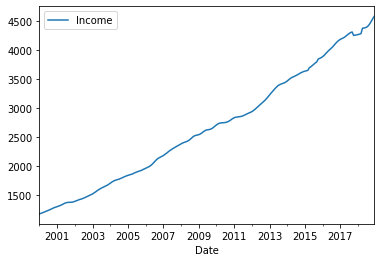

In [ ]:
#Plotting the data to observe if there is any time components present in the data
data.plot()
plt.show()

From the graph we can observe that trend is present in the given data and hence the series is not stationary. To confirm the non stationarity present in the data we go for ADF test.

In [ ]:
#ADF test for checking the stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Income'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 2.7052660214900124
p-value: 0.9990872789945887
Critical Values:
	1%: -3.461136478222043
	5%: -2.875078880098608
	10%: -2.5739861168199027


The time series is considered stationary if the p-value is low and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics. But here we clearely observe that the ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary. To make stationary series we use variance differencing method.

In [ ]:
# Variance differencing method
v=np.var(data['Income'])
print(v)
diff1=data['Income']-data['Income'].shift(1)
v1=np.var(diff1)
print(v1)
if (v<v1):
    st="original series is stationary"
else:
    st="original series is not stationary"
print(st)
diff2=data['Income']-data['Income'].shift(2)
v2=np.var(diff2)
print(v2)
if (v1<v2):
    st="First differenced series is stationary"
else:
    st="First differenced series is not stationary"
print(st)

970130.130272391
115.66281356129586
original series is not stationary
319.9377846738194
First differenced series is stationary


Since variance of first differenced series is less than variance of second differenced series, we consider first differenced series is stationary series, and hence we consider order os d as 1.

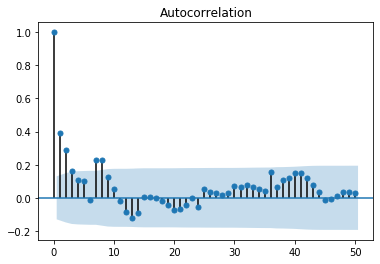

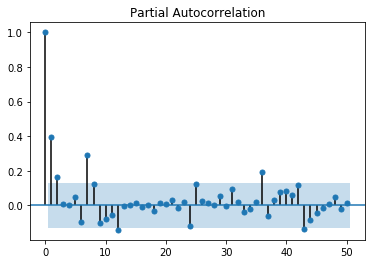

In [ ]:
#ACF and PACF plot to find the order of the time series model.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff1.dropna(), lags=50)
plt.show()
plot_pacf(diff1.dropna(), lags=50)
plt.show()

In [ ]:
#At which point the series becomes stationary, that differenced series order is considered as order of d.
d=1
#lag at zero is always 1,hence we do not consider that as significant
#From ACF plot we can observe that first 3 lags are significant. Hence value of q is 3.
q1=3

#From PACF plot we can observe that first 2 lags are significant. Hence value of p is 2.
p1=2

C:\Users\sudhanvashastri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sudhanvashastri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\sudhanvashastri\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                 Income   No. Observations:                  228
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -843.207
Date:                Fri, 02 Apr 2021   AIC                           1698.415
Time:                        17:52:47   BIC                           1718.965
Sample:                    01-01-2000   HQIC                          1706.707
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0942      0.065      1.450      0.147      -0.033       0.222
ar.L2          0.8906      0.079     11.236      0.000       0.735       1.046
ma.L1          0.2726      0.065      4.211      0.0

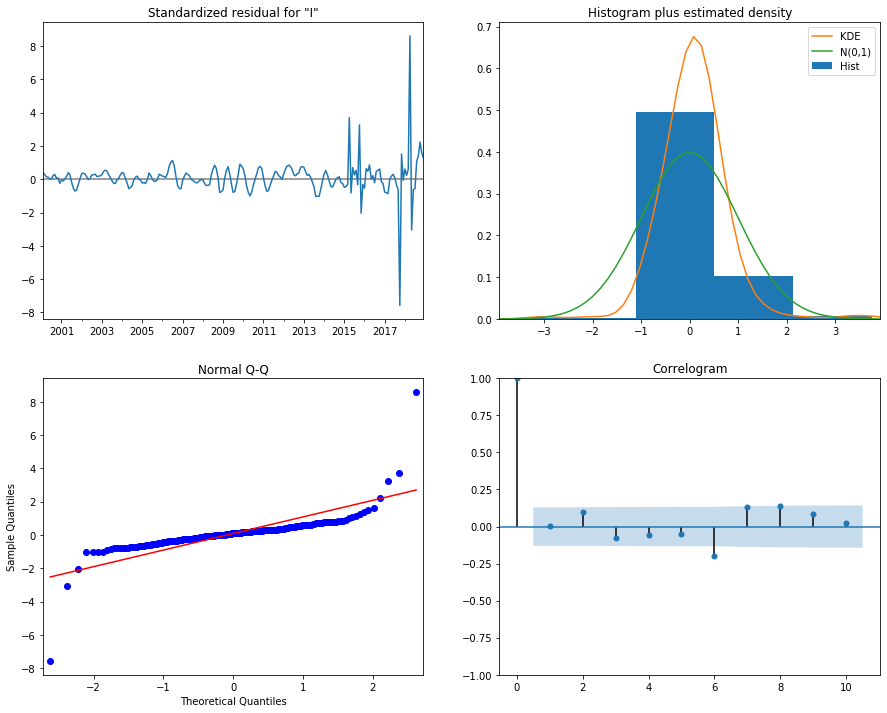

In [ ]:
#Fitting ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Income'], order=(p1,d,q1))
results = model.fit()
# summary of fitted model model
print(results.summary())
# Model diagnostic plots
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the ARIMA model does not satisfy these properties, then the fitted model is not good fit for the data.

From QQ-plot we can observe that the residuals are almost normally distributed. From the top right plot we can observa that KDE is closely follows normality. Hence we can say that residuals are almost normally distributed.
From top left and bottom right plot we can observe that residuals are almost stationary.
Hence we can say that the fitted model is good fit for the data. Hence we go for forecasting the future income of the company.

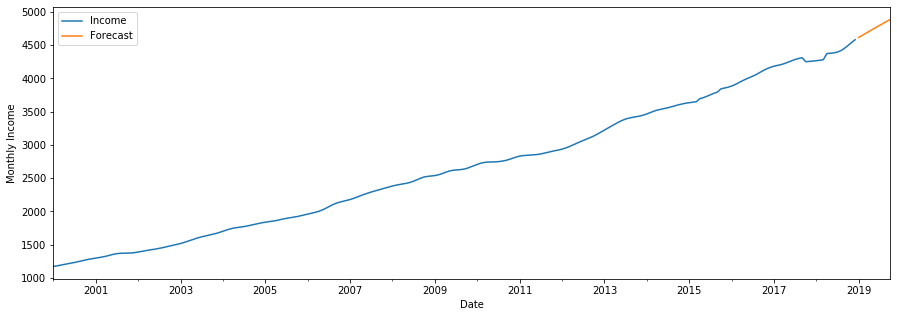

In [ ]:
# Get forecast 10 steps ahead in future
pred = results.get_forecast(steps=10)
ax = data.plot(label='observed', figsize=(15, 5))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Income')
plt.legend()
plt.show()